In [4]:
import sys
sys.path.append("..")

In [5]:
from masked_transformer import MaskGit

In [6]:
from torchview import draw_graph

In [9]:
import torch

In [15]:
from vae import VQGanVAE
from trainers import VQGanVAETrainer

from maskgit_lowres_trainer import MaskGitTrainer
from masked_transformer import MaskGitTransformer, MaskGit, TokenCritic

train_path = "../COCO-Captions/train2017"
valid_path = "../COCO-Captions/val2017"

vae = VQGanVAE(
    dim = 128,
    codebook_size = 8192
)

transformer = MaskGitTransformer(
    num_tokens = 8192,       # must be same as codebook size above
    seq_len = 16*16,            # must be equivalent to fmap_size ** 2 in vae
    dim = 2048,                # model dimension
    depth = 24,                # depth
    dim_head = 64,            # attention head dimension
    heads = 8,                # attention heads,
    ff_mult = 2,              # feedforward expansion factor
)

base_maskgit = MaskGit(
    vae = vae,                 # vqgan vae
    transformer = transformer, # transformer
    image_size = 256,          # image size
    cond_drop_prob = 0.25,     # conditional dropout, for classifier free guidance
    self_token_critic = True,
    no_mask_token_prob = 0.25,
).cuda()

In [16]:
base_maskgit(images_or_ids = torch.rand(1, 3, 256, 256).cuda(), texts=["text goes brr"])

tensor(9.9345, device='cuda:0', grad_fn=<AddBackward0>)

In [30]:
graph = draw_graph(base_maskgit, input_data = dict(images_or_ids = torch.rand(1, 3, 256, 256), texts = ["text goes brr"]), depth = 3)

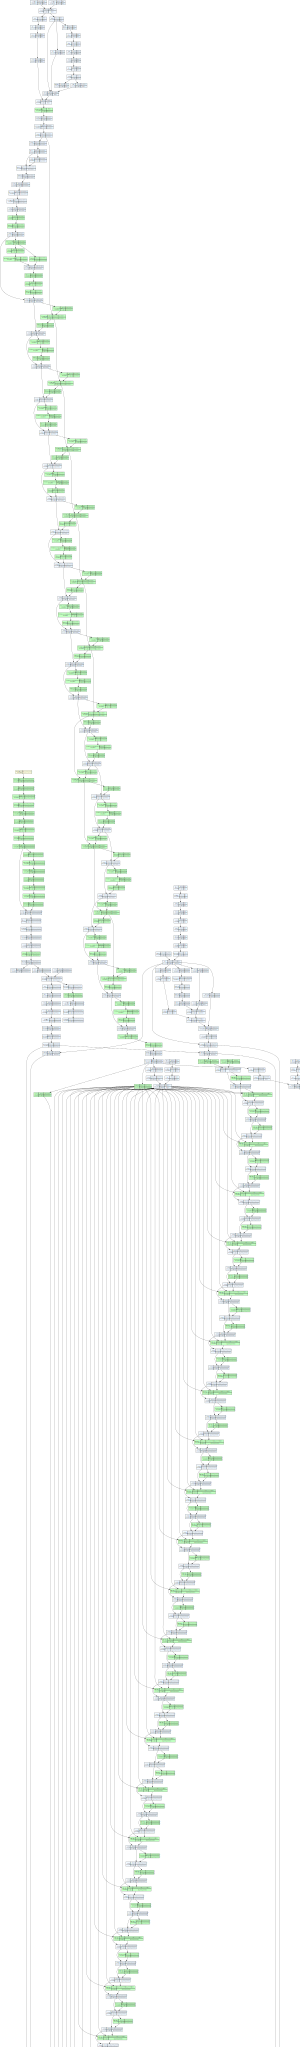

In [32]:
graph.visual_graph